In [1]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import platform
import warnings
warnings.filterwarnings("ignore")
import patoolib

In [2]:
ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/home/pep/drive/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

fold_name = 'AI Specialist Lesson 06'

path = ds_path + fold_name
os.chdir(ds_path)

if not os.path.exists(path):
    patoolib.extract_archive(f"{fold_name}.rar")

os.chdir(path)


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from AI Specialist Lesson 06.rar

Creating    AI Specialist Lesson 06                                   OK
Extracting  AI Specialist Lesson 06/Data Mining Process 01.png           0  OK 
Extracting  AI Specialist Lesson 06/Data Mining Process 02.png           4  OK 
Extracting  AI Specialist Lesson 06/Machine Learning Process 2.png      18  OK 
Extracting  AI Specialist Lesson 06/Machine Learning Process.png        18  OK 
Extracting  AI Specialist Lesson 06/Semi-Conductor 1.png                22  OK 
Extracting  AI Specialist Lesson 06/Semi-Conductor 2.png                23  OK 
Extracting  AI Specialist Lesson 06/Semi-Conductor.png                  63  OK 
Extracting  AI Specialist Lesson 06/uci-secom.csv                       97  OK 
Extracting  AI Specialist Lesson 06/Unbalanced Data.png                 98  OK 
Extracting  AI Specialist Lesson 06/XGBoost.png                         99  OK 
All OK

In [3]:
data = pd.read_csv('uci-secom.csv')
print(data.shape)
display(data.head())

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [5]:
anomalyValue = 0
data = data.fillna(anomalyValue)
data.isnull().any().any()

False

<AxesSubplot:>

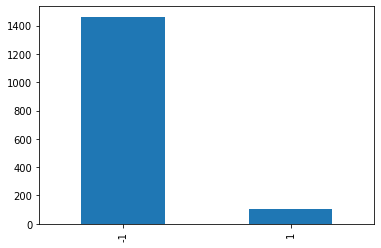

In [6]:
data['Pass/Fail'].value_counts().plot(kind='bar')

In [7]:
data = data.drop('Time', axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [8]:
np.random.seed(1)

In [9]:
target = "Pass/Fail"
target_idx = 590

In [10]:
data_os = data.copy()
X = data_os.iloc[:, :target_idx]
y = data_os.iloc[:, target_idx]
print(X.shape, y.shape)

(1567, 590) (1567,)


In [11]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

## Oversampling before split train/test set

In [12]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state=1)
X_os, y_os = oversampling.fit_resample(X, y.values)

print(X_os.shape, y_os.shape)
print(pd.DataFrame(y_os).value_counts())

(2926, 590) (2926,)
-1    1463
 1    1463
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2, random_state=1)

print(X_train_os.shape)
print(X_test_os.shape)
print(y_train_os.shape)
print(y_test_os.shape)

(2340, 590)
(586, 590)
(2340,)
(586,)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline

sc = StandardScaler()
pca = PCA(n_components=150, random_state=1)
xgbc = XGBClassifier(eval_metric='logloss')

model_pipeline = Pipeline([
    ('sc', sc),
    ('pca', pca),
    ('xgbc', xgbc)
])

model_pipeline.fit(X_train_os, y_train_os)


Pipeline(steps=[('sc', StandardScaler()),
                ('pca', PCA(n_components=150, random_state=1)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', v

In [15]:
y_pred_os = model_pipeline.predict(X_test_os)

[[300   0]
 [  0 286]]


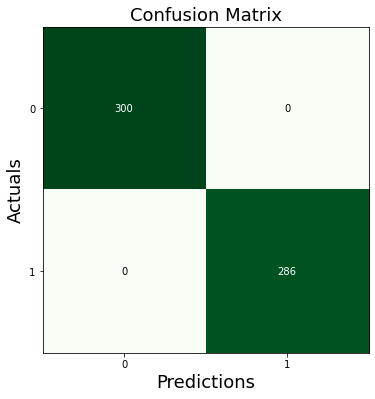

In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_os, y_pred_os)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

[[1463    0]
 [   0  104]]


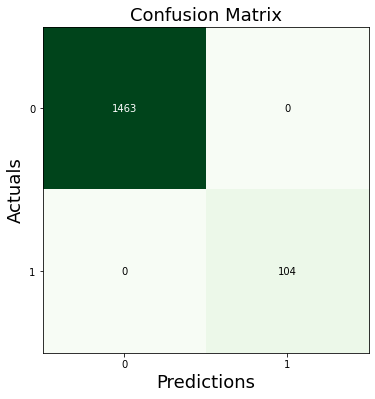

In [17]:
y_pred_1 = model_pipeline.predict(X)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, y_pred_1)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Oversampling after train/test/ split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1253, 590)
(314, 590)
(1253,)
(314,)


In [19]:
y_train.value_counts()

-1    1169
 1      84
Name: Pass/Fail, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state=1)
X_train_os, y_train_os = oversampling.fit_resample(X_train, y_train)

print(X_train_os.shape, y_train_os.shape)
print(pd.DataFrame(y_train_os).value_counts())

(2338, 590) (2338,)
Pass/Fail
-1           1169
 1           1169
dtype: int64


In [21]:
X_train_os

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,2945.220000,2570.440000,2194.955600,2341.783300,2.391700,100.0,86.810000,0.123100,1.420700,0.008600,...,0.000000,0.000000,0.497600,0.016400,0.003500,3.294500,0.055200,0.017800,0.005100,32.205800
1,2938.020000,2499.680000,2114.666700,1549.487400,1.339300,100.0,98.784400,0.126200,1.444600,-0.010900,...,0.004500,65.218600,0.501400,0.008100,0.002400,1.618000,0.022000,0.014300,0.004500,65.218600
2,2911.220000,2556.640000,2204.288900,2637.998900,1.554900,100.0,86.108900,0.123400,1.443900,-0.009400,...,0.006100,178.040500,0.498500,0.015300,0.004100,3.067000,0.010400,0.018500,0.006100,178.040500
3,3047.000000,2436.010000,2213.755600,1113.559900,0.721700,100.0,104.166700,0.121100,1.560800,-0.000400,...,0.000000,0.000000,0.496400,0.010700,0.003100,2.164600,0.016500,0.031800,0.010200,192.913000
4,2992.400000,2590.800000,2223.900000,1745.372400,1.997400,100.0,96.756700,0.124100,1.551900,-0.027300,...,0.000000,0.000000,0.503900,0.015100,0.003700,3.003900,0.016700,0.013200,0.003900,79.108600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,3106.419665,2402.135026,2186.509636,1582.625352,1.222814,100.0,100.994994,0.123164,1.535388,-0.016649,...,0.003028,35.588398,0.496614,0.016397,0.003861,3.294090,0.031081,0.022494,0.006606,73.310432
2334,2927.581052,2486.751178,2197.985760,1238.823808,0.842498,100.0,106.661504,0.122430,1.455991,0.011722,...,0.000000,0.000000,0.502283,0.016874,0.004548,3.363364,0.011500,0.014804,0.004678,173.190006
2335,2953.192031,2612.780493,2201.470101,1047.297731,1.172239,100.0,103.183948,0.120584,1.459397,0.010747,...,0.007669,130.034153,0.506585,0.011092,0.003138,2.187673,0.020162,0.026247,0.007669,130.034153
2336,3020.976701,2417.339433,2175.864085,1008.280328,0.813769,100.0,102.203894,0.121947,1.469643,-0.013458,...,0.005489,106.554974,0.503177,0.014431,0.004177,2.867016,0.016760,0.017719,0.005489,106.554974


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline

sc = StandardScaler()
pca = PCA(n_components=150, random_state=1)
xgbc = XGBClassifier(eval_metric='logloss')

model_pipeline = Pipeline([
    ('sc', sc),
    ('pca', pca),
    ('xgbc', xgbc)
])

model_pipeline.fit(X_train_os, y_train_os)

Pipeline(steps=[('sc', StandardScaler()),
                ('pca', PCA(n_components=150, random_state=1)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', v

[[294   0]
 [ 20   0]]


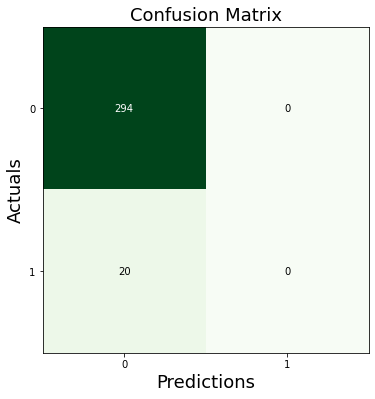

In [23]:
y_pred = model_pipeline.predict(X_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Undersampling

In [24]:
# Data under-sampling
data_us = data.copy()
failed_indices = np.array(data_us[data_us[target] == 1].index)
num_failed_indices = len(failed_indices)
print(num_failed_indices)
print(failed_indices)

104
[   2   10   11   14   23   38   40   45   48   49   50   57   58   62
   64   82   96  115  131  154  157  158  167  169  180  182  186  188
  189  218  222  231  235  236  238  240  241  243  244  273  277  282
  291  294  321  323  326  327  336  344  351  368  373  392  406  424
  441  448  495  508  518  576  583  601  605  634  709  795  797  826
  831  871  914  924  926  929 1029 1062 1144 1151 1185 1189 1211 1227
 1238 1241 1242 1254 1302 1303 1324 1325 1327 1328 1329 1342 1343 1363
 1364 1365 1400 1438 1443 1519]


In [25]:
normal_indices = np.array(data_us[data_us[target] == -1].index)
num_normal_indices = len(normal_indices)
print(num_normal_indices)

1463


In [26]:
random_normal_indices = np.random.choice(
    normal_indices,
    size=num_failed_indices,
    replace=False)

len(random_normal_indices)

104

In [27]:
under_sample = np.concatenate([failed_indices, random_normal_indices])
print(len(under_sample))

208


<AxesSubplot:>

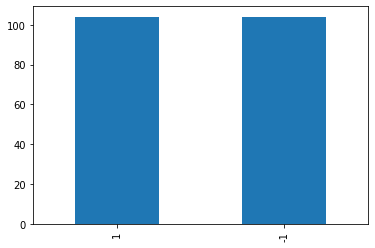

In [28]:
data_us = data_us.iloc[under_sample, :]
data_us['Pass/Fail'].value_counts().plot(kind='bar')

In [29]:
print(data_us.shape)
data_us.reset_index(drop=True).head()

(208, 591)


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
1,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,0.1223,1.5144,-0.0190,...,57.8122,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122,1
2,2928.84,2479.40,2196.2111,1605.7578,0.9959,100.0,97.9156,0.1257,1.4690,0.0170,...,75.5077,0.4987,0.0427,0.0092,8.5646,0.0370,0.0279,0.0081,75.5077,1
3,2963.97,2629.48,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.4474,0.0144,...,142.9080,0.5077,0.0094,0.0026,1.8483,0.0202,0.0289,0.0084,142.9080,1
4,2884.74,2514.54,2160.3667,899.9488,1.4022,100.0,105.4978,0.1240,1.5585,-0.0317,...,216.8869,0.4982,0.0099,0.0027,1.9771,0.0098,0.0213,0.0077,216.8869,1


In [30]:
# Training
_X = data_us.iloc[:, :target_idx]
_y = data_us.iloc[:, target_idx]

In [31]:
from sklearn.model_selection import train_test_split

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(_X, _y, test_size=0.2, random_state=1)

print(X_train_us.shape)
print(X_test_us.shape)
print(y_train_us.shape)
print(y_test_us.shape)

(166, 590)
(42, 590)
(166,)
(42,)


In [32]:
data_cp = data.copy()
X = data_cp.iloc[:, :target_idx].to_numpy()
y = data_cp.iloc[:, target_idx].to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1253, 590)
(314, 590)
(1253,)
(314,)


In [33]:
def undersampling(X, y):
    failed_indices = np.where(y == 1)[0]
    num_failed_indices = len(failed_indices)
    normal_indices = np.where(y == -1)[0]
    num_normal_indices = len(normal_indices)
    random_normal_indices = np.random.choice(
        normal_indices,
        size=num_failed_indices,
        replace=False
    )
    under_sample = np.concatenate([failed_indices, random_normal_indices])
    X_us, y_us = X[under_sample, :], y[under_sample]
    return X_us, y_us

In [34]:
X_us , y_us = undersampling(X_train, y_train)

print(X_us.shape)
print(y_us.shape)

(168, 590)
(168,)


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline

sc = StandardScaler()
pca = PCA(n_components=162, random_state=1)
xgbc = XGBClassifier(eval_metric='logloss')

model_pipeline = Pipeline([
    ('sc', sc),
    ('pca', pca),
    ('xgbc', xgbc)
])

model_pipeline.fit(X_us, y_us)

Pipeline(steps=[('sc', StandardScaler()),
                ('pca', PCA(n_components=162, random_state=1)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', v

[[150 144]
 [  6  14]]


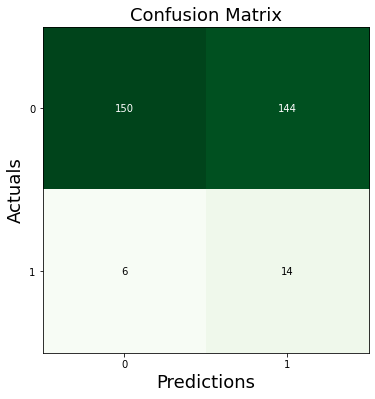

In [36]:
y_pred_us = model_pipeline.predict(X_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_us)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random oversampling

In [91]:
data_os = data.copy()
X = data_os.iloc[:, :target_idx]
y = data_os.iloc[:, target_idx]
print(X.shape, y.shape)

(1567, 590) (1567,)


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1253, 590)
(314, 590)
(1253,)
(314,)


In [93]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [95]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.8)

X_train_os, y_train_os = over.fit_resample(X, y)
X_train_us, y_train_us = under.fit_resample(X_train_os, y_train_os)

print(X_train_us.shape, y_train_us.shape)
pd.DataFrame(y_train_us).value_counts()

(1316, 590) (1316,)


Pass/Fail
-1           731
 1           585
dtype: int64

In [65]:
def undersampling(X, y):
    failed_indices = np.where(y == 1)[0]
    num_failed_indices = len(failed_indices)
    normal_indices = np.where(y == -1)[0]
    num_normal_indices = len(normal_indices)
    random_normal_indices = np.random.choice(
        normal_indices,
        size=num_failed_indices,
        replace=False
    )
    under_sample = np.concatenate([failed_indices, random_normal_indices])
    X_us, y_us = X[under_sample, :], y[under_sample]
    return X_us, y_us

In [66]:
X_train_us, y_train_us = undersampling(X_train_os.values, y_train_os.values)

print(X_train_us.shape, y_train_us.shape)
print(pd.DataFrame(y_train_us).value_counts())

(1462, 590) (1462,)
-1    731
 1    731
dtype: int64


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_us, y_train_us, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1052, 590)
(264, 590)
(1052,)
(264,)


In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
pca = PCA(n_components=100, random_state=1)
xgbc = XGBClassifier(eval_metric='logloss')

model_pipeline = Pipeline([
    ('sc', sc),
    ('pca', pca),
    ('xgbc', xgbc)
])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model_pipeline, X_train_us, y_train_us, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

# model_pipeline.fit(X_train, y_train)

/home/pep/anaconda3/envs/AI_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/pep/anaconda3/envs/AI_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/pep/anaconda3/envs/AI_env/lib/python3.8/site-package

F1 Score: 0.992


In [102]:
y_pred = model_pipeline.predict(X_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.